# -=-=-=-=-=-=-=K-Nearest Neighbor-=-=-=-=-=-=-

In [ ]:
# Mounting your Google Drive to your Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### KNN is one the simplest learning algorithm that does not apply any assumption on the data. It  measures the distance between the datapoints 

In [ ]:
# Importing the required libraries.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

## Binary Classification

### We start with a simple example of two class classification problem. The dataset contains 569 subjects from each 30 features were extracted and labeled as 1 or 0 to present the malignant or benign breast cancer.

In [ ]:
# Loading the data (features and labels)
cancer_breast = load_breast_cancer()
x = pd.DataFrame(cancer_breast.data, columns = cancer_breast.feature_names)
x = x[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(cancer_breast.target, cancer_breast.target_names)
y = pd.get_dummies(y, drop_first=True)

### The model should be learned with training data, then, the performance of the learned model should be evaluated over the unseen test data.

In [ ]:
# Splitting 25% of the data into train and the rest to the test sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [ ]:
# Compiling the KNN model 
n_neighbor = 3
knn = KNeighborsClassifier(n_neighbors = n_neighbor, metric='euclidean')
# Training the complied model with training data
knn.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
# Predicting the unseen data and quantify the model performance:
y_pred = knn.predict(x_test)
print('Prediction Accuracy Score is:',metrics.accuracy_score(y_test,y_pred))

Prediction Accuracy Score is: 0.8321678321678322


### Visualization of the KNN Performance:
The dimension of the employed data set is 30. Therefore, for simplicity, we use only two features to visualize a 2D scatterplot of the datapoints compared against the predicted ones.

<Axes: xlabel='mean area', ylabel='mean compactness'>

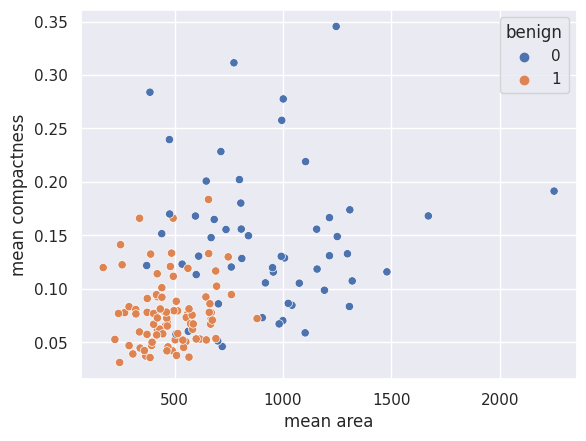

In [ ]:
# Scatter plot of the prediction
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=x_test.join(y_test, how='outer'))

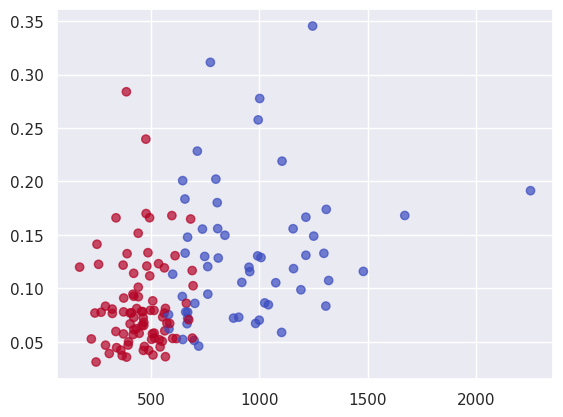

In [ ]:
# Scatter plot of the real data
plt.scatter(
    x_test['mean area'],
    x_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7)

### Changing the value of nearest neighbors and find out its effect!
To better understand how the value of nearest neighbor (K) affect the performance and generalization power
of the KNN model, we are going to train different KNN models with different K values.


In [ ]:
k_val = [1,3,5,7,9,11,15,17,19, 25]

for k in k_val:
    knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    performance = metrics.accuracy_score(y_test,y_pred)
    print('Prediction performance of KNN with K of {} is {}'.format(k, performance))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Prediction performance of KNN with K of 1 is 0.7902097902097902
Prediction performance of KNN with K of 3 is 0.8321678321678322
Prediction performance of KNN with K of 5 is 0.8461538461538461


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Prediction performance of KNN with K of 7 is 0.8461538461538461
Prediction performance of KNN with K of 9 is 0.8531468531468531
Prediction performance of KNN with K of 11 is 0.8601398601398601


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Prediction performance of KNN with K of 15 is 0.8601398601398601
Prediction performance of KNN with K of 17 is 0.8741258741258742
Prediction performance of KNN with K of 19 is 0.8811188811188811
Prediction performance of KNN with K of 25 is 0.8601398601398601


### Another Example:
We are going to use a real clinical data set (Data1.csv). This data set contain 216 subjects each of which presented with 100 quantified values (clinical Proteomics). Out of all the subjects, 121 are diagnosed as ovarian cancer and 95 are healthy subjects. Therefore, it is binary classification and the class labels are set as -1 and +1.

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data/Data1.csv', header=None) # Input data

In [ ]:
# Set the first 100 columns as input data
x_ovarian = data.values[:, :100]

# Set the last column as targets
y_ovarian = data.values[:, 100]

# spliting the data into train and test sets randomly.
x_tr_ovar, x_test_ovar, y_tr_ovar, y_test_ovar = train_test_split(x_ovarian, y_ovarian, test_size = 0.2, random_state = 1)

In [ ]:
k_val = [1,3,5,7,9,11,15,17]
for k in k_val:
    knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn.fit(x_tr_ovar, y_tr_ovar)
    y_pred_over = knn.predict(x_test_ovar)
    performance = metrics.accuracy_score(y_test_ovar, y_pred_over)
    print('Prediction performance of KNN with K of {} is {}'.format(k, performance))

Prediction performance of KNN with K of 1 is 0.9090909090909091
Prediction performance of KNN with K of 3 is 0.9318181818181818
Prediction performance of KNN with K of 5 is 0.9318181818181818
Prediction performance of KNN with K of 7 is 0.9318181818181818
Prediction performance of KNN with K of 9 is 0.8636363636363636
Prediction performance of KNN with K of 11 is 0.8863636363636364
Prediction performance of KNN with K of 15 is 0.8636363636363636
Prediction performance of KNN with K of 17 is 0.8636363636363636


In [ ]:
# TODO: How do you interprete the effect of K on the model performance?